**Instituto Tecnologico de Estudios Superiores de Occidente**

*Simulación Matemática*

**Integrantes:**  


- Juan de Dios González Escobar. 
    
- Gustavo Daniel González Escobar. 

**Objetivo**

Resolver problemas de la vida cotidiana, por medio de la programación lineal, Ajuste de curvas 
y Optimización, con ayuda de las herramientas vistas en clase. Utilizando principalmente la maximización y minimización de las ganancias de la aerolinea.  

**Objetivos especificos**

Principalmente tendremos un problema de Ajuste de curvas, en donde utilizamos datos sobre el consumo de energía en nuestro pais, Mexico. 
Posteriormente realizamos un problema de Programación lineal acerca de una compañia de aviones y sus trayectorias, en donde minimizaremos y maximizaremos las ganancias de la aerolinea. 

## Programación Lineal

**Enunciado.** Una compañía aérea dispone de dos tipos de aviones $A_1$, y $A_2$., para cubrir un determinado
trayecto. El avión $A_1$, debe hacer el trayecto más veces que el avión $A_2$ pero no puede sobrepasar $120$
viajes. Entre los dos aviones deben hacer más de $60$ vuelos, pero menos de $200$. En cada viaje del avión $A_1$ la empresa gana $\$30000$ y $\$20000$ por cada viaje del avión $A_2$. ¿Cuántos viajes debe hacer cada avión para obtener el máximo de ganancias?

*Definición de variables*: Sea $x_1$ la cantidad de viajes del avión $A_1$ y $x_2$ la cantidad de viajes del avión $A_2$.

**Punto 1 .** Escribe la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

La función a maximizar viene dada por

$$\max_{x_1,\cdots,x_2} 30000x_1+20000x_2$$

y las restricciones están dadas por la información dada en la tabla

$$x_1 \leq 120$$
$$x_2 < x_1$$
$$x_1+x_2 \geq 61$$
$$x_1+x_2 \leq 199$$

*Tomé unas restricciones como no inclusivas, o sea menor a 200 es $\leq 199$
y mayor a 60 es $ \geq 61$

In [18]:
import scipy.optimize as opt
import numpy as np

In [19]:
#Escribe aquí las matrices como arreglos de Numpy

A_ub = np.array([
    [-1,0],
    [0,-1],
    [-1,-1],
    [-1,-1]
])


c = np.array([30000,20000])

b_ub = np.array([-120,-1,-61,-199])

In [20]:
resultado = opt.linprog(c,A_ub,b_ub)
resultado

     con: array([], dtype=float64)
     fun: 5179999.988852078
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 3.74052433e-09,  7.79999994e+01,  1.37999999e+02, -5.59266340e-07])
  status: 0
 success: True
       x: array([120.        ,  78.99999944])

El problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?, ¿Cuántos viajes debe hacer cada avión?

In [21]:
import scipy.optimize as opt

In [22]:
resultado = opt.linprog(c,A_ub,b_ub)
resultado

     con: array([], dtype=float64)
     fun: 5179999.988852078
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 3.74052433e-09,  7.79999994e+01,  1.37999999e+02, -5.59266340e-07])
  status: 0
 success: True
       x: array([120.        ,  78.99999944])

**Conclusión**


En total, el avión 1 debe hacer 120 viajes y el avión 2, 79, cumpliendo así los requisitos y restricciones,

y en total el máximo que se puede ganar son $518000$

## Ajuste de curvas 

**Enunciado**. El archivo `renewable_energy.csv` contiene información histórica anual de México relativa al consumo de energías de fuentes renovables en porcentaje desde el año 1990 hasta el año 2015. La primer columna corresponde al consecutivo, la segunda a los años, y la tercera al consumo.

Tomado de: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

**Punto 1 .** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [14]:
import pandas as pd

In [15]:
doc_neim = "renewable_energy.csv"
data = pd.read_csv(doc_neim)
data

,Consecutivo,Year,% of total final energy consumption
0,1,1990,14.413302
1,2,1991,13.195512
2,3,1992,13.427092
3,4,1993,13.303969
4,5,1994,11.863103
5,6,1995,13.261833
6,7,1996,13.064724
7,8,1997,12.699777
8,9,1998,12.238453
9,10,1999,12.748461


**Punto 2 .** Usando el consecutivo como variable independiente $x$ y el consumo de energías renovables como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de consumo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [16]:
x = data.iloc[:,0].values
y = data.iloc[:,2].values

In [17]:
def fun_obj(beta,x,y,n):  #n para no hacer fun obj para c/u
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

In [18]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))       # 1,2 y 3 del fun obj de c/u
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [19]:
ajuste1

      fun: 8.12743960894789
 hess_inv: array([[ 0.08154301, -0.00461618],
       [-0.00461618,  0.00034202]])
      jac: array([-1.19209290e-07, -1.78813934e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([14.00697767, -0.21443891])

In [20]:
ajuste2

      fun: 6.773933447390879
 hess_inv: array([[ 2.02692316e-01, -3.05769240e-02,  9.61538487e-04],
       [-3.05769240e-02,  5.90506726e-03, -2.06043959e-04],
       [ 9.61538487e-04, -2.06043959e-04,  7.63125770e-06]])
      jac: array([0.00000000e+00, 5.96046448e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 1.45796249e+01, -3.37149020e-01,  4.54481895e-03])

In [21]:
ajuste3

      fun: 4.722277479146915
 hess_inv: array([[ 4.16555251e-01, -1.17530677e-01,  8.86287773e-03,
        -1.95094793e-04],
       [-1.17530677e-01,  4.12592779e-02, -3.41862082e-03,
         7.93228850e-05],
       [ 8.86287773e-03, -3.41862082e-03,  2.99552652e-04,
        -7.20793579e-06],
       [-1.95094793e-04,  7.93228850e-05, -7.20793579e-06,
         1.77973730e-07]])
      jac: array([-5.96046448e-08, -5.96046448e-08, -5.96046448e-08, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.36463465e+01,  4.23092471e-02, -2.99359076e-02,  8.51375965e-04])

In [22]:
beta1 = ajuste1.x
beta2 = ajuste2.x
beta3 = ajuste3.x

In [23]:
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

In [24]:
import matplotlib.pyplot as plt

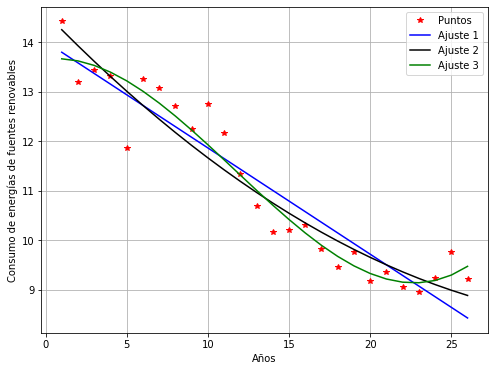

In [25]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'r*',ms = 6,label='Puntos')
plt.plot(x,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(x,yhat2,'k',ms = 6,label='Ajuste 2')
plt.plot(x,yhat3,'g',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('Consumo de energías de fuentes renovables')
plt.show()

Text(0, 0.5, 'Error')

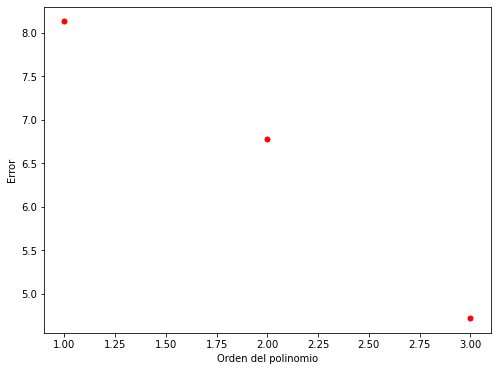

In [26]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

**Conclusión**

Según la gráfica anterior, el polinomio que mejor se ajusta es el de tercer grado pues como se observa, el error es menor.

Aunque creo que se puede mejorar pues todavía hay algo de margen de error que se puede cubrir con un polinomio de mayor grado.

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el consumo en el año 2015 y compare con el dato real $9.215\%$.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [27]:
x = 26
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

yhat1,yhat2,yhat3,9.215

(8.43156603354521, 8.886047934988497, 9.473497351047817, 9.215)

**Conclusión**. 

El polinomio que mejor estima este dato es el polinomio de grado tres.

**Referencias**

Renewable energy consumption (% of total final energy consumption) | Data. (s. f.). The World Bank. Recuperado 26 de febrero de 2021, de https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart